Task 1 Reflection: Mention that your unit of analysis is the "individual marketing contact." A limitation is that some clients appear multiple times, meaning the rows aren't strictly independent.

Task 2 Reflection: State that you are performing Classification. Mention that while duration is a strong predictor, you removed it because you cannot know the duration of a call before it happens (predictive realism).

Task 3 Reflection: Explain that poutcome (previous outcome) is highly useful because it captures the client's existing relationship with the bank.

Task 6 Reflection: Explain that the test set was held back to ensure your final evaluation isn't biased by the "trial and error" process used during the validation phase.

--- MODEL PERFORMANCE: TRAIN VS VALIDATION ---
Baseline Tree:
  Training Accuracy:   0.9041
  Validation Accuracy: 0.8956
  Generalization Gap:  0.0085

Random Forest:
  Training Accuracy:   0.9029
  Validation Accuracy: 0.9005
  Generalization Gap:  0.0024

Gradient Boost:
  Training Accuracy:   0.9085
  Validation Accuracy: 0.8981
  Generalization Gap:  0.0105

--- FINAL TEST SET PERFORMANCE ---
Baseline Tree Test Accuracy: 0.9017
Random Forest Test Accuracy: 0.8968
Gradient Boost Test Accuracy: 0.8956


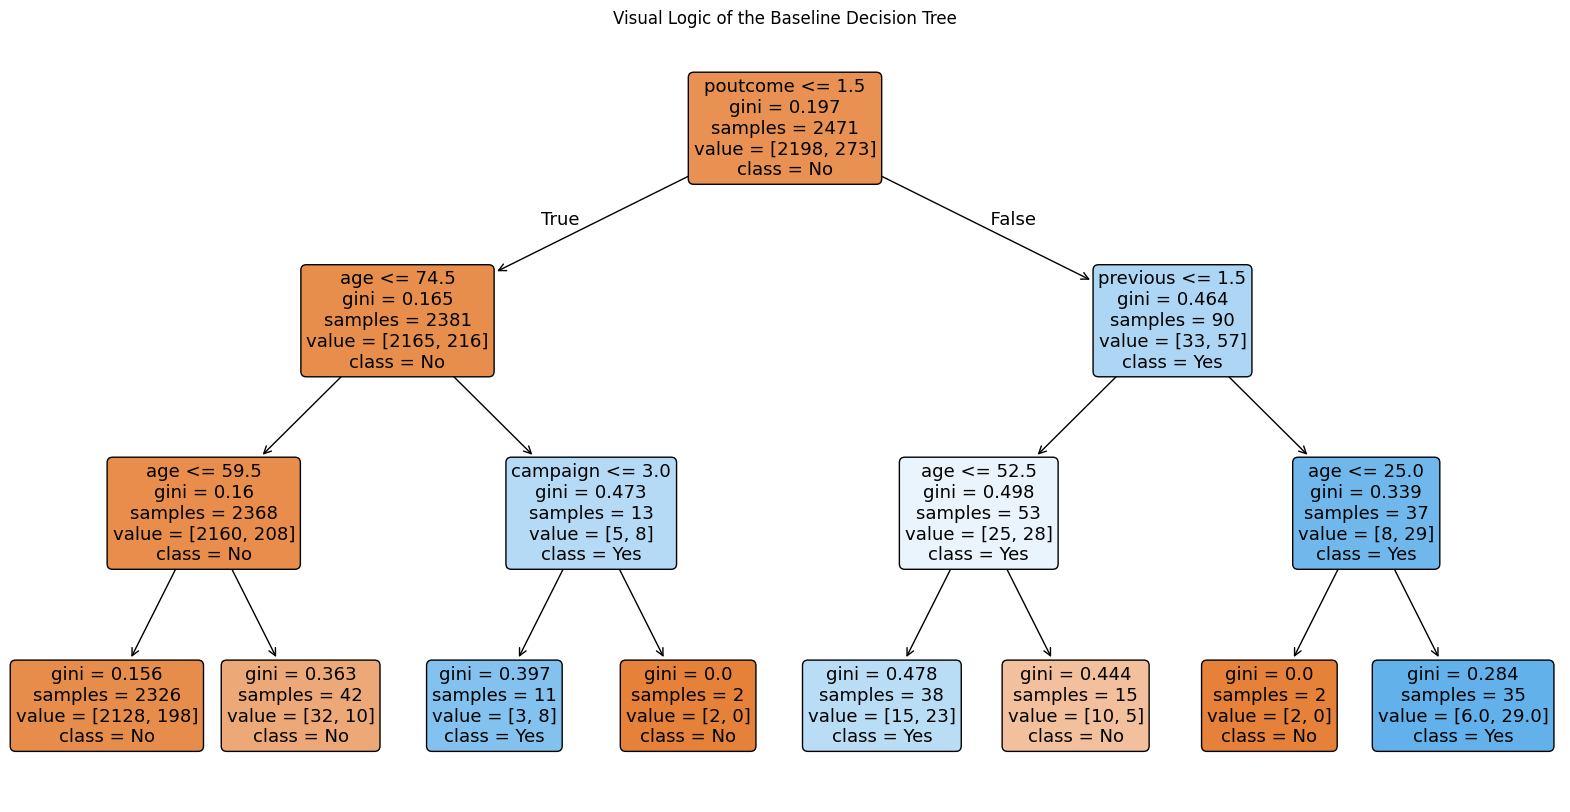

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# --- Task 1 & 2: Dataset Setup and Target Selection ---
# Loading the bank data using the semicolon separator
df = pd.read_csv('bank-additional.csv', sep=';')

# Defining our target for a binary classification task
# 1 = Subscribed ('yes'), 0 = Not subscribed ('no')
df['target'] = (df['y'] == 'yes').astype(int)

# --- Task 3: Feature Construction (With Restraint) ---
# We select features available BEFORE the contact occurs to avoid leakage.
# 'duration' is omitted here as it is not known until the call ends.
features = ['age', 'campaign', 'previous', 'poutcome']
X = df[features].copy()

# Simple encoding for 'poutcome' to allow tree processing
# (nonexistent=0, failure=1, success=2)
X['poutcome'] = X['poutcome'].map({'nonexistent': 0, 'failure': 1, 'success': 2})
y = df['target']

# --- Task 5: Splitting the Data ---
# 60% Train, 20% Validation, 20% Test [cite: 98, 99]
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# --- Task 4: Training Tree-Based Models ---
# We stick to shallow trees (max_depth=3) to focus on behavior [cite: 93, 94]
models = {
    "Baseline Tree": DecisionTreeClassifier(max_depth=3, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42),
    "Gradient Boost": GradientBoostingClassifier(n_estimators=50, max_depth=3, random_state=42)
}

# --- Task 5: Comparison Analysis ---
print("--- MODEL PERFORMANCE: TRAIN VS VALIDATION ---")
for name, model in models.items():
    model.fit(X_train, y_train)

    t_acc = accuracy_score(y_train, model.predict(X_train))
    v_acc = accuracy_score(y_val, model.predict(X_val))

    print(f"{name}:")
    print(f"  Training Accuracy:   {t_acc:.4f}")
    print(f"  Validation Accuracy: {v_acc:.4f}")
    print(f"  Generalization Gap:  {abs(t_acc - v_acc):.4f}\n")

# --- Task 6: Final Test Evaluation (Once) ---
# This is our final check on unseen data to ensure the model generalizes [cite: 110]
print("--- FINAL TEST SET PERFORMANCE ---")
for name, model in models.items():
    test_acc = accuracy_score(y_test, model.predict(X_test))
    print(f"{name} Test Accuracy: {test_acc:.4f}")

# Visualizing the Decision Tree logic for the report
plt.figure(figsize=(20, 10))
plot_tree(models["Baseline Tree"], feature_names=features,
          class_names=['No', 'Yes'], filled=True, rounded=True)
plt.title("Visual Logic of the Baseline Decision Tree")
plt.show()